<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/SkillSlash_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SLR

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("HomeProducts_raw_data.csv")
df.head()

,S. No.,Advertisement,Sales
0,1,62.00,270.0
1,2,76.33,200.0
2,3,72.00,240.0
3,4,60.00,250.0
4,5,61.00,180.0


In [ ]:
# pip install --upgrade --no-deps statsmodels

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = sm.add_constant(df['Advertisement'])
Y = df['Sales']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X.head()

,const,Advertisement
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [ ]:
model = sm.OLS(Y,X).fit()

In [ ]:
model.params

const            61.555355
Advertisement     3.076177
dtype: float64

In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.139   
Dependent Variable: Sales            AIC:                570.3957
Date:               2022-02-17 08:29 BIC:                574.2197
No. Observations:   50               Log-Likelihood:     -283.20 
Df Model:           1                F-statistic:        8.893   
Df Residuals:       48               Prob (F-statistic): 0.00449 
R-squared:          0.156            Scale:              5068.8  
-----------------------------------------------------------------
                  Coef.  Std.Err.   t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
const            61.5554  66.7019 0.9228 0.3607 -72.5578 195.6685
Advertisement     3.0762   1.0315 2.9822 0.0045   1.0022   5.1502
-----------------------------------------------------------------
Omnibus:              1.393        Durbin-Watson:           2.012
Prob(Omnibus):        0.498        Jarque-Bera (JB):        1.291
Skew:                 0.256        Prob(JB):                0.524
Kurtosis:             2.403        Condition No.:           428  
=================================================================

"""

In [ ]:
pred_y = model.predict(X)

In [ ]:
df['ŷ'] = pred_y

In [ ]:
df.head()

,S. No.,Advertisement,Sales,ŷ
0,1,62.00,270.0,252.278356
1,2,76.33,200.0,296.359979
2,3,72.00,240.0,283.040131
3,4,60.00,250.0,246.126002
4,5,61.00,180.0,249.202179


---

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
np.abs(r2_score(Y,pred_y))

0.15631530754337553

**With Train Test Split**

In [ ]:
df = pd.read_csv("HomeProducts_raw_data.csv")
df.head()

,S. No.,Advertisement,Sales
0,1,62.00,270.0
1,2,76.33,200.0
2,3,72.00,240.0
3,4,60.00,250.0
4,5,61.00,180.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S. No.         50 non-null     int64  
 1   Advertisement  50 non-null     float64
 2   Sales          50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [ ]:
X = sm.add_constant(df['Advertisement'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
Y = df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, train_size=0.8, random_state=101)

In [ ]:
model = sm.OLS(train_Y,train_X).fit()

In [ ]:
model.params

const            26.216370
Advertisement     3.640221
dtype: float64

In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.169   
Dependent Variable: Sales            AIC:                461.0303
Date:               2022-02-17 08:29 BIC:                464.4081
No. Observations:   40               Log-Likelihood:     -228.52 
Df Model:           1                F-statistic:        8.925   
Df Residuals:       38               Prob (F-statistic): 0.00491 
R-squared:          0.190            Scale:              5648.7  
-----------------------------------------------------------------
                 Coef.  Std.Err.   t    P>|t|    [0.025   0.975] 
-----------------------------------------------------------------
const           26.2164  79.0179 0.3318 0.7419 -133.7469 186.1797
Advertisement    3.6402   1.2185 2.9874 0.0049    1.1735   6.1070
-----------------------------------------------------------------
Omnibus:              2.389        Durbin-Watson:           1.795
Prob(Omnibus):        0.303        Jarque-Bera (JB):        1.681
Skew:                 0.296        Prob(JB):                0.432
Kurtosis:             2.189        Condition No.:           431  
=================================================================

"""

In [ ]:
pred_y = model.predict(test_X)
pred_y

37    215.507839
14    273.751368
21    208.227398
32    226.428501
22    277.391589
1     304.074405
26    208.227398
46    273.751368
42    297.048780
47    277.391589
dtype: float64

In [ ]:
np.abs(r2_score(test_Y, pred_y))

0.3168890782271623

**Predciting a single observation**

In [ ]:
Xnew = [1,60]
pred_yy = model.predict(Xnew)

In [ ]:
pred_yy

array([244.62960356])

---

Normal P-P plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
sales_residuals = model.resid
sales_residuals.head()

16   -61.793794
24   -84.587177
7    -38.751368
45   -55.820270
18   -50.031809
dtype: float64

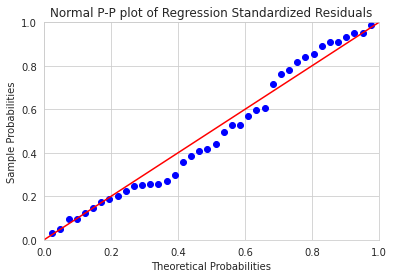

+ Good normal distribution of the residuals


In [ ]:
probplot = sm.ProbPlot(sales_residuals)
probplot.ppplot(line='45')
plt.title("Normal P-P plot of Regression Standardized Residuals")
plt.show()

print("+ Good normal distribution of the residuals")

Test for constant variance

In [ ]:
def standardize(vals):
  return (vals-vals.mean())/vals.std()

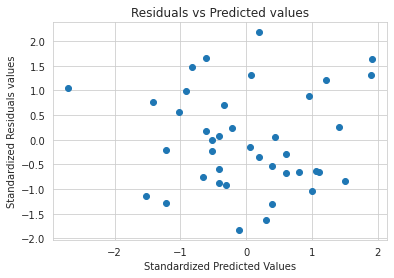

In [ ]:
plt.scatter(standardize(model.fittedvalues), standardize(sales_residuals))
plt.title("Residuals vs Predicted values")
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residuals values")
plt.show()

Prediction intervals

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
_,pred_y_low, pred_y_high = wls_prediction_std(model, test_X, alpha=0.05)

In [ ]:
pred_y_df = pd.DataFrame({'Advertisment': test_X['Advertisement'], 'pred_y':pred_y, 'pred_y_left': pred_y_low, 'pred_y_right':pred_y_high})

In [ ]:
pred_y_df.head()

,Advertisment,pred_y,pred_y_left,pred_y_right
37,52.0,215.507839,58.599450,372.416228
14,68.0,273.751368,119.414082,428.088654
21,50.0,208.227398,50.305482,366.149314
32,55.0,226.428501,70.759353,382.097648
22,69.0,277.391589,122.881308,431.901870


# Outlier Analysis

Z Score

In [ ]:
from scipy.stats import zscore

In [ ]:
df['Z_Score_sales'] = zscore(df['Sales'])

In [ ]:
df.head()

,S. No.,Advertisement,Sales,Z_Score_sales
0,1,62.00,270.0,0.155481
1,2,76.33,200.0,-0.766241
2,3,72.00,240.0,-0.239543
3,4,60.00,250.0,-0.107868
4,5,61.00,180.0,-1.029590


In [ ]:
df[(df['Z_Score_sales'] > 3) | (df['Z_Score_sales'] < -3)]

,S. No.,Advertisement,Sales,Z_Score_sales


Leverage Plots

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

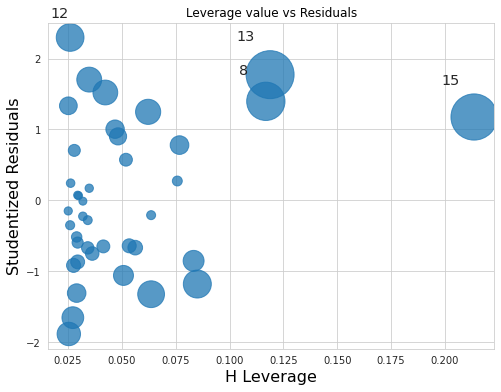

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
influence_plot(model, ax=ax)
plt.title("Leverage value vs Residuals")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence as olsi

In [ ]:
studentized_residuals = olsi(model).resid_studentized

In [ ]:
leverage_pts = olsi(model).hat_matrix_diag

In [ ]:
high_resid = [i for i in studentized_residuals if(abs(i) > 3)]
high_resid

[]

In [ ]:
high_lev = [i for i in leverage_pts if abs(i) > (3/len(leverage_pts))]
high_lev

[0.08328084078833481,
 0.08501176323129322,
 0.2135102053146798,
 0.07571564513616161,
 0.07673943647522485,
 0.1168231211473163,
 0.11879879102939961]

In [ ]:
sales_influence = model.get_influence()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


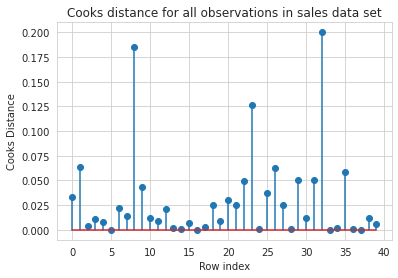

In [ ]:
(c,p) = sales_influence.cooks_distance
#c is cook's distance, p is corresponding p-values

plt.stem(np.arange(len(train_X)), np.round(c,3), markerfmt='C0o')
plt.title("Cooks distance for all observations in sales data set")
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

# MLR Advertising

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = sm.add_constant(df[['TV', 'Radio', 'Newspaper']])
Y = df['Sales']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X.head()

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [ ]:
model = sm.OLS(Y,X).fit()

In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                780.3622
Date:               2022-02-18 14:36 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
const           2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
Radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
Newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
-----------------------------------------------------------------
Omnibus:             60.414       Durbin-Watson:          2.084  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       151.241
Skew:                -1.327       Prob(JB):               0.000  
Kurtosis:            6.332        Condition No.:          454    
=================================================================

"""

In [ ]:
model.params

const        2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

***Train test split***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state=101)

In [ ]:
model1 = sm.OLS(y_train, X_train).fit()

In [ ]:
model1.params

const        3.151527
TV           0.044696
Radio        0.187566
Newspaper   -0.000323
dtype: float64

In [ ]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.883   
Dependent Variable: Sales            AIC:                559.5194
Date:               2022-02-18 14:36 BIC:                571.2859
No. Observations:   140              Log-Likelihood:     -275.76 
Df Model:           3                F-statistic:        351.2   
Df Residuals:       136              Prob (F-statistic): 7.96e-64
R-squared:          0.886            Scale:              3.0973  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
const           3.1515    0.3958   7.9618  0.0000   2.3687  3.9343
TV              0.0447    0.0018  25.1210  0.0000   0.0412  0.0482
Radio           0.1876    0.0106  17.6516  0.0000   0.1666  0.2086
Newspaper      -0.0003    0.0074  -0.0439  0.9650  -0.0149  0.0142
-----------------------------------------------------------------
Omnibus:             59.711       Durbin-Watson:          2.314  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       187.097
Skew:                -1.643       Prob(JB):               0.000  
Kurtosis:            7.613        Condition No.:          471    
=================================================================

"""

In [ ]:
pred_y = model1.predict(X_test)

***Perform Evaluation***

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test, pred_y)

1.2137457736144808

In [ ]:
mean_absolute_percentage_error(y_test, pred_y)

0.1183135913054663

In [ ]:
r2_score(y_test, pred_y)

0.9185780903322446

***Polynomial Regression***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df.drop('Sales', axis=1)
Y = df['Sales']

In [ ]:
poly_instance = PolynomialFeatures(degree=2, include_bias=True)


+ include_bias is similar to sm.add_constant
+ degree=2 signifies: we have x1,x2,x3, it will calculate x1^2, x2^2, x3^2, x1.x2, x1.x3, x2.x3, so total we get 9 variables

In [ ]:
poly_instance.fit(X)

PolynomialFeatures()

In [ ]:
poly_features = poly_instance.transform(X)
poly_features[0]

array([1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
       5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
       2.615760e+03, 4.788640e+03])

The order is x1,x2,x3,x1^2,x1.x2,x1.x3,x2^2,x2.x3,x3^2

In [ ]:
X.shape

(200, 3)

In [ ]:
poly_features.shape

(200, 10)

In [ ]:
X = poly_features

In [ ]:
model2 = sm.OLS(Y,X).fit()

In [ ]:
model2.params

const    5.084782
x1       0.051653
x2       0.021074
x3       0.006884
x4      -0.000110
x5       0.001105
x6      -0.000046
x7       0.000112
x8       0.000083
x9       0.000012
dtype: float64

In [ ]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.986    
Dependent Variable: Sales            AIC:                386.2787 
Date:               2022-02-18 14:36 BIC:                419.2619 
No. Observations:   200              Log-Likelihood:     -183.14  
Df Model:           9                F-statistic:        1543.    
Df Residuals:       190              Prob (F-statistic): 1.72e-172
R-squared:          0.987            Scale:              0.38474  
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      5.0848     0.2390    21.2787   0.0000    4.6134    5.5561
x1         0.0517     0.0022    22.9974   0.0000    0.0472    0.0561
x2         0.0211     0.0126     1.6750   0.0956   -0.0037    0.0459
x3         0.0069     0.0080     0.8631   0.3892   -0.0088    0.0226
x4        -0.0001     0.0000   -15.7783   0.0000   -0.0001   -0.0001
x5         0.0011     0.0000    29.0430   0.0000    0.0010    0.0012
x6        -0.0000     0.0000    -1.9149   0.0570   -0.0001    0.0000
x7         0.0001     0.0002     0.4583   0.6472   -0.0004    0.0006
x8         0.0001     0.0002     0.4856   0.6278   -0.0003    0.0004
x9         0.0000     0.0001     0.1623   0.8712   -0.0001    0.0002
------------------------------------------------------------------
Omnibus:              145.912      Durbin-Watson:         2.136   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      2613.928
Skew:                 -2.477       Prob(JB):              0.000   
Kurtosis:             20.004       Condition No.:         213732  
==================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

By doing this we have improved the R^2

***Choosing the best degree of polynomial***

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Advertising.csv")
X = df.drop('Sales', axis=1)
Y = df['Sales']

In [ ]:
train_mape_lst = []
test_mape_lst = []

In [ ]:
for i in range(1,10):
  poly_instance = PolynomialFeatures(degree=i, include_bias=True)
  poly_features = poly_instance.fit_transform(X)
  
  X_train, X_test, y_train, y_test = train_test_split(poly_features,Y, train_size=0.7, random_state=101)
  model = sm.OLS(y_train, X_train).fit()

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test) 

  train_mape_lst.append(mean_absolute_percentage_error(y_train, train_pred))
  test_mape_lst.append(mean_absolute_percentage_error(y_test, test_pred))


In [ ]:
rdf = pd.DataFrame({'Train':train_mape_lst, 'Test':test_mape_lst})
rdf

,Train,Test
0,0.147021,0.118314
1,0.051343,0.053755
2,0.035793,0.043956
3,0.027467,0.041435
4,0.016424,0.061374
5,0.014444,0.112579
6,0.023955,4.605665
7,0.045503,265.273760
8,0.046666,3424.929019


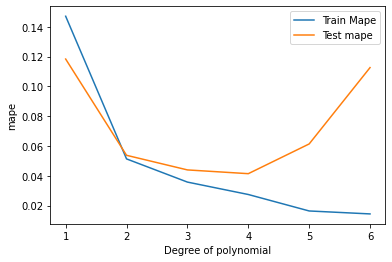

In [ ]:
plt.plot(range(1,7), rdf['Train'].iloc[:6], label="Train Mape")
plt.plot(range(1,7), rdf['Test'].iloc[:6], label="Test mape")
plt.xlabel("Degree of polynomial")
plt.ylabel("mape")
plt.legend()
plt.show()

Degree of polynomial should be choosen where before the curve shouldn't start giving high results, like in this case 4 is the optimal degree because after test_mape starts departing higher. And also to reduce overfitting we consider degree as 3.

***Final Model***

In [ ]:
df = pd.read_csv("Advertising.csv")
X = df.drop('Sales',axis=1)
Y = df['Sales']

In [ ]:
final_poly_instance = PolynomialFeatures(degree=3, include_bias = False)
final_poly_features = final_poly_instance.fit_transform(X)

In [ ]:
final_model = sm.OLS(Y, final_poly_features).fit()

***Model prediction***

In [ ]:
test_data = [[149,22,12]] #TV, Radio, Newspaper
#convert the new data into a polynomial feature set
test_poly_fe = final_poly_instance.fit_transform(test_data)

In [ ]:
test_poly_fe

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [ ]:
test_poly_fe.shape

(1, 19)

In [ ]:
result = final_model.predict(test_poly_fe)

In [ ]:
print(result)

[14.9141421]


***Residual analysis***

In [ ]:
residuals = final_model.resid
residuals

0      1.117116
1     -0.432548
2      0.754175
3      0.065687
4     -0.194988
         ...   
195    1.572155
196    0.384720
197    0.286997
198   -0.411322
199    0.265808
Length: 200, dtype: float64

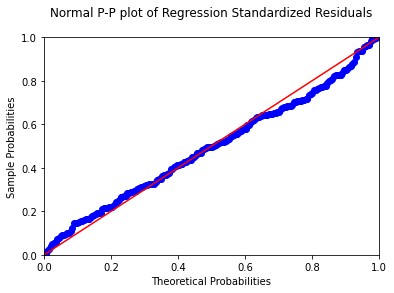

In [ ]:
probplot = sm.ProbPlot(residuals)
probplot.ppplot(line='45')
plt.title("Normal P-P plot of Regression Standardized Residuals\n")
plt.show()

In [ ]:
final_model.params

x1     1.261988e-01
x2     2.198370e-01
x3     1.234717e-01
x4    -5.697323e-04
x5     5.323155e-04
x6    -6.190489e-04
x7    -2.906033e-03
x8    -4.495668e-03
x9    -3.366549e-04
x10    9.252401e-07
x11    4.185316e-09
x12    1.071802e-06
x13    6.915197e-06
x14    5.332985e-06
x15    5.431213e-07
x16    7.495736e-06
x17    4.436494e-05
x18    1.302445e-05
x19   -1.302743e-06
dtype: float64

Test for constant variance

In [ ]:
def standardize(vals):
  return (vals-vals.mean())/vals.std()

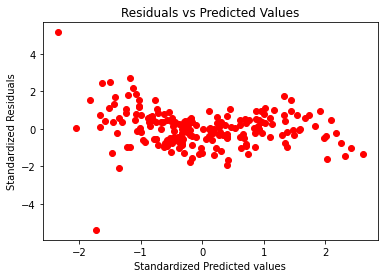

In [ ]:
plt.scatter(standardize(final_model.fittedvalues), standardize(residuals), c='r')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Standardized Predicted values")
plt.ylabel("Standardized Residuals")
plt.show()

***Dummy Variables***

The file salary_raw_data provides salary and educational qualifications of 30 randomly chosen people. Build a regression model to establish the relationship between salary earned and their educational qualifications. 
If we build a model Y = b0 + b1 × Education, it will be incorrect. We have to use dummy variables.
+ High School: 1
+ Graduate: 2
+ Post Graduate: 3
+ None: 4


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
df = pd.read_excel('Salary_dummy_raw_data.xlsx')
df.head(15)

,Education,Salary
0,1,9800
1,1,10200
2,1,14200
3,1,21000
4,1,16500
5,1,19210
6,1,9700
7,1,11000
8,1,7800
9,1,8800


In [ ]:
df['Education'] = df['Education'].apply(str)

In [ ]:
#Dummy variables
df_dummies = pd.get_dummies(df['Education'], drop_first=True)
df_dummies.head(15)

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [ ]:
df_dummies.shape

(30, 3)

In [ ]:
# df_dummies.drop(4, axis=1, inplace=True)

In [ ]:
df = pd.concat([df_dummies, df['Salary']], axis=1)

In [ ]:
df.columns

Index(['2', '3', '4', 'Salary'], dtype='object')

In [ ]:
X = sm.add_constant(df[['2','3','4']])
y = df['Salary']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X.head()

,const,2,3,4
0,1.0,0,0,0
1,1.0,0,0,0
2,1.0,0,0,0
3,1.0,0,0,0
4,1.0,0,0,0


In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.678     
Dependent Variable: Salary           AIC:                567.8202  
Date:               2022-02-18 14:37 BIC:                573.4249  
No. Observations:   30               Log-Likelihood:     -279.91   
Df Model:           3                F-statistic:        21.39     
Df Residuals:       26               Prob (F-statistic): 3.41e-07  
R-squared:          0.712            Scale:              8.5882e+06
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     12821.0000  926.7235 13.8348 0.0000 10916.0926 14725.9074
2          4794.0000 1310.5849  3.6579 0.0011  2100.0541  7487.9459
3          7229.0000 1733.7409  4.1696 0.0003  3665.2445 10792.7555
4         -5437.6667 1513.3331 -3.5932 0.0013 -8548.3675 -2326.9659
-------------------------------------------------------------------
Omnibus:                9.027        Durbin-Watson:           1.184
Prob(Omnibus):          0.011        Jarque-Bera (JB):        7.645
Skew:                   0.961        Prob(JB):                0.022
Kurtosis:               4.557        Condition No.:           4    
===================================================================

"""

In [ ]:
model.params

const    12821.000000
2         4794.000000
3         7229.000000
4        -5437.666667
dtype: float64

In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred

0     12821.000000
1     12821.000000
2     12821.000000
3     12821.000000
4     12821.000000
5     12821.000000
6     12821.000000
7     12821.000000
8     12821.000000
9     12821.000000
10    17615.000000
11    17615.000000
12    17615.000000
13    17615.000000
14    17615.000000
15    17615.000000
16    17615.000000
17    17615.000000
18    17615.000000
19    17615.000000
20    20050.000000
21    20050.000000
22    20050.000000
23    20050.000000
24     7383.333333
25     7383.333333
26     7383.333333
27     7383.333333
28     7383.333333
29     7383.333333
dtype: float64

In [ ]:
mean_absolute_percentage_error(y,y_pred)

0.15874349640616378

In [ ]:
r2_score(y,y_pred)

0.7116390666848543

Salary = 7383 + 5437HS + 10231UG + 12666PG

***Illustration:***

+ The TRP ratings, money spent on Promotion(P), and the advertismenet revennue(R) generated over one-month period for 38 OTT series programs is provided by NETFLIX.
+ Develop a multiple linear regression model to understand the realtionshop between the advertisment revenue (R) generated as response variable and promotions (P) and TRP as predictors.

(On Excel)

# IPL Data MLR

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel("IPL Raw Data.xlsx")
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.000000,0.000000,0,307,15,20.466667,8.898551,13.933333,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.000000,0.000000,0,29,0,0.000000,14.500000,0.000000,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.555556,121.014493,5,1059,29,36.517241,8.810316,24.896552,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.800000,76.315789,0,1125,49,22.959184,6.232687,22.142857,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.925000,120.714940,28,0,0,0.000000,0.000000,0.000000,2011,100000,800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR -B          130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [ ]:
df.drop(['Sl.NO.', 'TEAM', 'PLAYER NAME'],axis=1, inplace=True)

In [ ]:
X_features = df.columns[:-3]
X_features

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S',
       'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS ',
       'AVE', 'SR -B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL'],
      dtype='object')

In [ ]:
df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [ ]:
pd.get_dummies(df['PLAYING ROLE'])

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
125,0,1,0,0
126,0,1,0,0
127,0,1,0,0
128,0,0,1,0


In [ ]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [ ]:
ipl_auction_encoded_df = pd.get_dummies(df[X_features], columns=categorical_features, drop_first=True)

In [ ]:
ipl_auction_encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.000000,0.000000,0,307,15,20.466667,8.898551,13.933333,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.000000,0.000000,0,29,0,0.000000,14.500000,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.555556,121.014493,5,1059,29,36.517241,8.810316,24.896552,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.800000,76.315789,0,1125,49,22.959184,6.232687,22.142857,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.925000,120.714940,28,0,0,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_features = ipl_auction_encoded_df.columns

In [ ]:
X = sm.add_constant(ipl_auction_encoded_df)
Y = df['SOLD PRICE']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,Y, train_size=0.8, random_state=42)

In [ ]:
ipl_model1 = sm.OLS(train_y, train_X).fit()

In [ ]:
ipl_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2855 
Date:                      2022-02-22 14:21        BIC:                       3049.9060 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375816.9723 228857.3507  1.6421 0.1049  -80401.8183  832035.7628
T-RUNS                     -53.7825     32.7172 -1.6439 0.1046    -119.0031      11.4381
T-WKTS                    -132.6078    609.7692 -0.2175 0.8285   -1348.1605    1082.9450
ODI-RUNS-S                  57.9487     31.5070  1.8392 0.0700      -4.8594     120.7569
ODI-SR-B                  -523.9786   1576.6348 -0.3323 0.7406   -3666.9426    2618.9854
ODI-WKTS                   815.4684    832.3989  0.9797 0.3305    -843.8884    2474.8252
ODI-SR-BL                 -772.7678   1536.3333 -0.5030 0.6165   -3835.3923    2289.8566
RUNS-S                     114.7169    173.3105  0.6619 0.5101    -230.7712     460.2050
HS                       -5516.3259   2586.3879 -2.1328 0.0363  -10672.1960    -360.4558
AVE                      21558.9476   7774.5497  2.7730 0.0071    6060.6661   37057.2291
SR -B                    -1324.9248   1373.1502 -0.9649 0.3378   -4062.2497    1412.4001
SIXERS                    4264.6509   4089.6313  1.0428 0.3005   -3887.8801   12417.1818
RUNS-C                      69.8912    297.6706  0.2348 0.8150    -523.5044     663.2867
WKTS                      3074.2351   7262.3939  0.4233 0.6733  -11403.0826   17551.5528
AVE-BL                    5183.2294  10229.2634  0.5067 0.6139  -15208.4345   25574.8934
ECON                     -6816.6095  13109.5774 -0.5200 0.6047  -32950.0744   19316.8554
SR-BL                    -7661.3607  14041.6868 -0.5456 0.5870  -35652.9518   20330.2303
AGE_2                  -230759.5427 114117.5207 -2.0221 0.0469 -458248.6625   -3270.4228
AGE_3                  -216808.7971 152248.3461 -1.4240 0.1588 -520310.3280   86692.7338
COUNTRY_BAN            -122177.9800 438715.2857 -0.2785 0.7814 -996740.9180  752384.9580
COUNTRY_ENG             672416.8353 238383.0277  2.8207 0.0062  197208.9549 1147624.7158
COUNTRY_IND             155340.8441 126320.7873  1.2297 0.2228  -96475.0431  407156.7313
COUNTRY_NZ              194201.8216 173492.1558  1.1194 0.2667 -151648.4700  540052.1132
COUNTRY_PAK              75939.0963 193468.6470  0.3925 0.6958 -309733.6028  461611.7955
COUNTRY_SA               64283.0585 144588.0273  0.4446 0.6579 -223947.9060  352514.0229
COUNTRY_SL               17430.4835 176340.7518  0.0988 0.9215 -334098.3804  368959.3474
COUNTRY_WI               10630.5352 230686.1409  0.0461 0.9634 -449233.8820  470494.9524
COUNTRY_ZIM            -145504.9315 401506.5803 -0.3624 0.7181 -945893.6708  654883.8079
PLAYING ROLE_Batsman     75746.9462 150249.7161  0.5041 0.6157 -223770.3886  375264.2810
PLAYING ROLE_Bowler      15370.3631 126307.6274  0.1217 0.9035 -236419.2902  267160.0164
PLAYING ROLE_W. Keeper  -71325.4340 213587.4521 -0.3339 0.7394 -497104.2380  354453.3701
CAPTAINCY EXP_1         164124.5812 123431.7812  1.3297 0.1878  -81932.1777  410181.3400
----------------------------------------------------------------

+ Durbin-Watson > 2: signifies higher auto-correlation
+ Multi-colinearity: the feature is highly correlated with other features in the model

***Performance Metrics***

In [ ]:
from sklearn import metrics

In [ ]:
pred_y = ipl_model1.predict(test_X)

In [ ]:
print("Average error is: ", np.round(np.sqrt(metrics.mean_squared_error(pred_y,test_y)),4)) #RMSE

Average error is:  304522.7039


In [ ]:
np.round(metrics.r2_score(pred_y,test_y),4) #R2 score

0.0289

***Measuring Multicollinearity***

+ vif > 4: high collinearity
+ 1,2 VIF = 1/(1-r^2(1,2))

In [ ]:
def get_vif_factors(X):
  X_matrix = X.values
  vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
  vif_factors = pd.DataFrame({'column':X.columns, 'VIF':vif})
  return vif_factors

In [ ]:
X[X_features] #features without the constant column

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.000000,0.000000,0,307,15,20.466667,8.898551,13.933333,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.000000,0.000000,0,29,0,0.000000,14.500000,0.000000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.555556,121.014493,5,1059,29,36.517241,8.810316,24.896552,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.800000,76.315789,0,1125,49,22.959184,6.232687,22.142857,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.925000,120.714940,28,0,0,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.800000,125.640000,2,0,0,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
126,6398,7,6814,75.78,3,86.6,3,3,3.000000,42.850000,0,0,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
127,1775,9,8051,87.58,109,44.3,1237,66,26.319149,131.876333,67,569,23,24.739130,7.024691,21.130435,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
128,1114,288,790,73.55,278,35.4,99,23,9.900000,91.666667,1,1783,65,27.430769,7.745439,21.261538,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,T-RUNS,12.612804
1,T-WKTS,7.679373
2,ODI-RUNS-S,16.425993
3,ODI-SR-B,13.829124
4,ODI-WKTS,9.951506
5,ODI-SR-BL,4.426814
6,RUNS-S,16.135175
7,HS,22.781620
8,AVE,25.227318
9,SR -B,21.576377


In [ ]:
columns_with_large_vif = vif_factors[vif_factors['VIF'] > 4].column

In [ ]:
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                      HS 
8                      AVE
9                    SR -B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

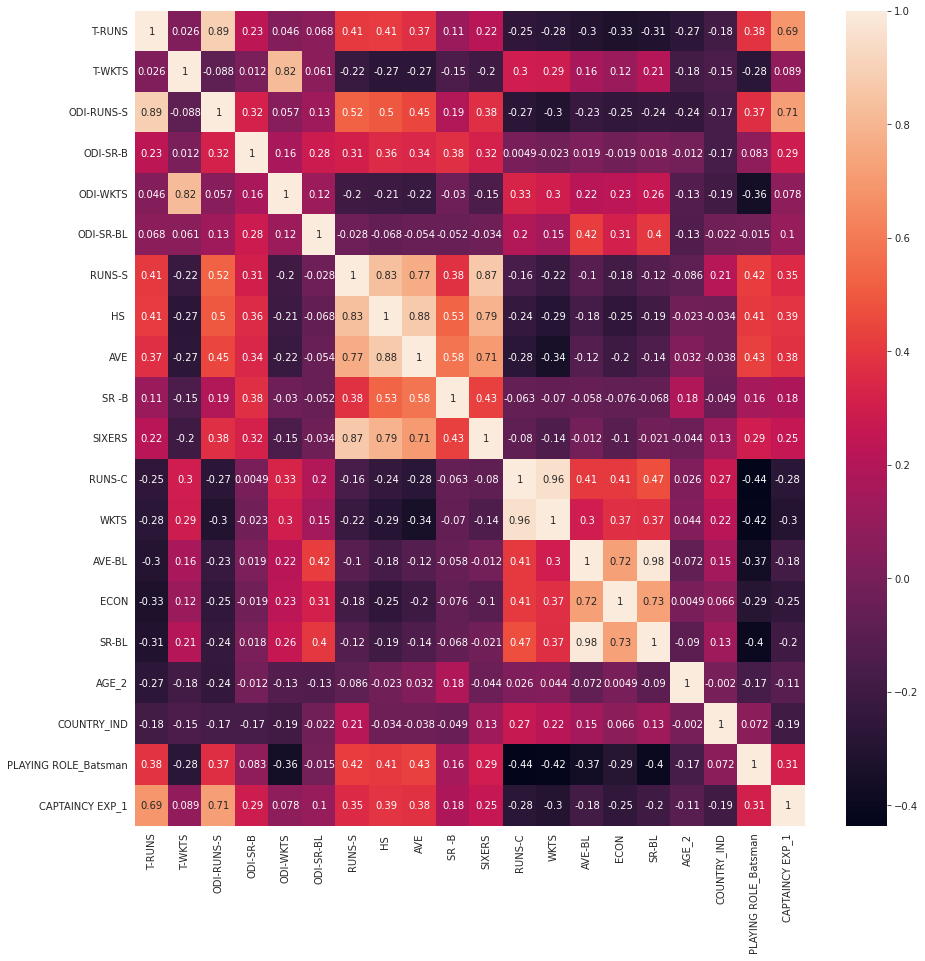

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X[columns_with_large_vif].corr(), annot=True, xticklabels=True, yticklabels=True)

+ T-Runs and ODI-Runs are highly correlated
+ ODI-wkts and T_wkts are highly correlated
+ Batsman features like RUN-S, HS, AVE, SIXERS are highly correlated
+ Bowler's features like AVE-BL, ECON, SR-BL are highly correlated
+ Last 4 columns were removed as subsequent VIF measure showed high collinearity

In [ ]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS ', 'AVE', 'RUNS-C', 'SR -B', 'AVE-BL', 'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [ ]:
#X_new_features = (X_features) - (columns_to_be_removed)
X_new_features = []
for column in X_features:
  if column not in columns_to_be_removed:
    X_new_features.append(column)

In [ ]:
get_vif_factors(X[X_new_features])

,column,VIF
0,ODI-WKTS,2.742889
1,ODI-SR-BL,2.822148
2,SIXERS,2.397409
3,WKTS,2.883101
4,AGE_3,1.779861
5,COUNTRY_BAN,1.094293
6,COUNTRY_ENG,1.131869
7,COUNTRY_IND,3.144668
8,COUNTRY_NZ,1.173418
9,COUNTRY_PAK,1.334773


In [ ]:
X_new_features

['ODI-WKTS',
 'ODI-SR-BL',
 'SIXERS',
 'WKTS',
 'AGE_3',
 'COUNTRY_BAN',
 'COUNTRY_ENG',
 'COUNTRY_IND',
 'COUNTRY_NZ',
 'COUNTRY_PAK',
 'COUNTRY_SA',
 'COUNTRY_SL',
 'COUNTRY_WI',
 'COUNTRY_ZIM',
 'PLAYING ROLE_Batsman',
 'PLAYING ROLE_Bowler',
 'PLAYING ROLE_W. Keeper',
 'CAPTAINCY EXP_1']

***Training with modified features***

In [ ]:
train_X = train_X[X_new_features]

In [ ]:
ipl_model2 = sm.OLS(train_y, train_X).fit()

In [ ]:
ipl_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2022-02-22 14:21   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

***Performance Metrics of Model 2***

In [ ]:
test_X = test_X[X_new_features]

In [ ]:
pred_y2 = ipl_model2.predict(test_X)

In [ ]:
np.sqrt(metrics.mean_squared_error(pred_y2, test_y))

271962.0703820107

In [ ]:
np.round(metrics.r2_score(pred_y2,test_y),4)

0.3167

---

***Model 3***

In [ ]:
significant_vars = ['SIXERS', 'COUNTRY_ENG', 'COUNTRY_IND', 'CAPTAINCY EXP_1']

In [ ]:
train_X = train_X[significant_vars]

In [ ]:
ipl_model3 = sm.OLS(train_y, train_X).fit()

In [ ]:
ipl_model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2022-02-22 14:21 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

In [ ]:
ipl_model3.params

SIXERS               8637.834426
COUNTRY_ENG        731833.638616
COUNTRY_IND        387890.253821
CAPTAINCY EXP_1    359725.274051
dtype: float64

In [ ]:
import scipy.stats as st

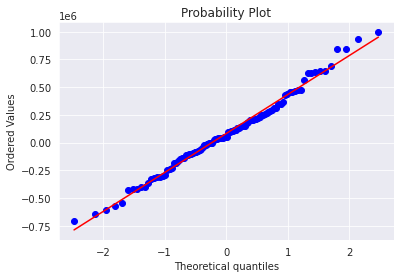

In [ ]:
probplot = st.probplot(ipl_model3.resid, plot=plt)

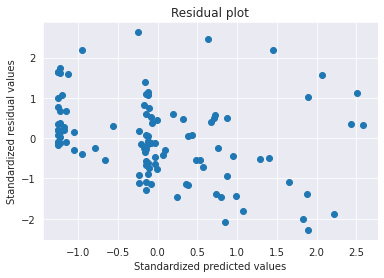

In [ ]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(ipl_model3.fittedvalues), get_standardized_values(ipl_model3.resid))
plt.title("Residual plot")
plt.xlabel("Standardized predicted values")
plt.ylabel("Standardized residual values")
plt.show()

***Performance Metrics for model-3***

In [ ]:
pred_y = ipl_model3.predict(test_X[train_X.columns])

In [ ]:
np.sqrt(metrics.mean_squared_error(pred_y,test_y)) #standard deviation

333693.4147524558

In [ ]:
np.round(metrics.r2_score(pred_y,test_y),4)

0.3058

***Measuring Influential Observations***


influence > 3(K+1)/N

In [ ]:
k = train_X.shape[1]
n = train_X.shape[0]

In [ ]:
print('No. of variables:', k, 'and number of observations:', n)

No. of variables: 4 and number of observations: 104


In [ ]:
leverage_cut_off = 3*((k+1)/n)
leverage_cut_off

0.14423076923076925

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

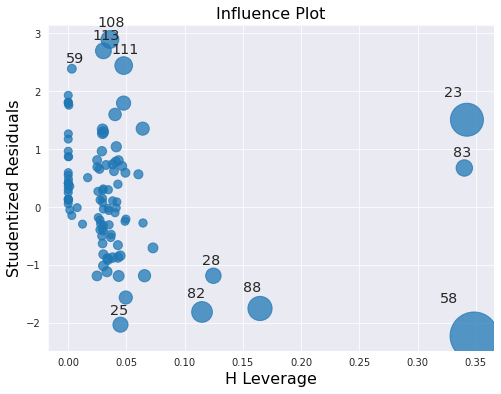

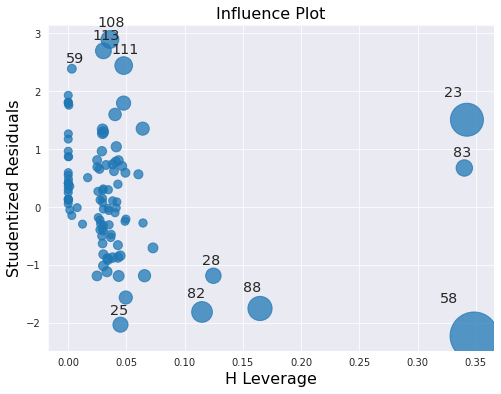

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
influence_plot(ipl_model3, ax=ax)

In [ ]:
df[df.index.isin([23,58,88])]

,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,2,ENG,Allrounder,3845,226,3394,88.82,169,33.2,1,62,24,31.000000,116.980000,2,105,2,52.500000,9.545455,33.000000,2009,950000,1550000
58,2,ENG,Allrounder,0,0,245,95.33,13,63.2,0,74,27,8.222222,101.369863,1,331,19,17.421053,7.012712,14.947368,2011,100000,100000
88,1,IND,Batsman,710,13,3525,92.71,16,61.9,0,2254,98,33.641791,139.393939,97,678,20,33.900000,7.047817,28.900000,2008,125000,650000


In [ ]:
train_X_new = train_X.drop([23,58,88], axis=0)
train_y_new = train_y.drop([23,58,88], axis=0)

In [ ]:
train_X_new

,SIXERS,COUNTRY_ENG,COUNTRY_IND,CAPTAINCY EXP_1
70,0,0,0,0
78,0,0,1,0
47,28,0,1,0
0,0,0,0,0
12,9,0,1,0
...,...,...,...,...
71,19,0,1,0
106,1,0,0,0
14,36,0,1,0
92,1,0,0,0


In [ ]:
ipl_model4 = sm.OLS(train_y_new, train_X_new).fit()

In [ ]:
ipl_model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.710     
Dependent Variable:     SOLD PRICE       AIC:                         2870.9052 
Date:                   2022-02-22 15:26 BIC:                         2881.3656 
No. Observations:       101              Log-Likelihood:              -1431.5   
Df Model:               4                F-statistic:                 62.82     
Df Residuals:           97               Prob (F-statistic):          4.28e-26  
R-squared (uncentered): 0.721            Scale:                       1.2457e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
SIXERS             10029.1011   1770.0111 5.6661 0.0000   6516.1191   13542.0831
COUNTRY_ENG       945392.2638 359288.4466 2.6313 0.0099 232304.1533 1658480.3743
COUNTRY_IND       387924.6265  61366.7462 6.3214 0.0000 266128.6225  509720.6304
CAPTAINCY EXP_1   303734.7027  75592.1328 4.0181 0.0001 153705.2441  453764.1614
--------------------------------------------------------------------------------
Omnibus:                   1.737             Durbin-Watson:                2.206
Prob(Omnibus):             0.420             Jarque-Bera (JB):             1.247
Skew:                      0.250             Prob(JB):                     0.536
Kurtosis:                  3.216             Condition No.:                266  
================================================================================

"""

In [ ]:
ipl_model4.params

SIXERS              10029.101115
COUNTRY_ENG        945392.263833
COUNTRY_IND        387924.626467
CAPTAINCY EXP_1    303734.702729
dtype: float64

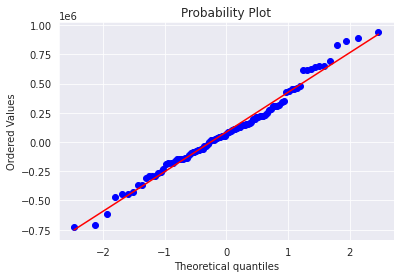

In [ ]:
probplot = st.probplot(ipl_model4.resid, plot=plt)

In [ ]:
pred_y = ipl_model4.predict(test_X[train_X_new.columns])

In [ ]:
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

344680.47272913647

In [ ]:
np.round(metrics.r2_score(pred_y,test_y),4)

0.3422

***Outlier Analysis***

Cook's distance

In [ ]:
influence = ipl_model4.get_influence()

In [ ]:
cooks = influence.cooks_distance

In [ ]:
print(cooks)

(array([0.        , 0.00553553, 0.00134112, 0.        , 0.00033606,
       0.00209003, 0.0039591 , 0.0082514 , 0.00567796, 0.05743172,
       0.00001732, 0.0041977 , 0.0004933 , 0.00002458, 0.00448311,
       0.00119878, 0.00206201, 0.0004263 , 0.        , 0.00069268,
       0.00001971, 0.00002067, 0.        , 0.05179085, 0.00001312,
       0.08217991, 0.        , 0.00017063, 0.00000085, 0.00651054,
       0.0000418 , 0.        , 0.00352655, 0.00004649, 0.0008561 ,
       0.00645368, 0.00720387, 0.00000008, 0.00003623, 0.00002403,
       0.00294084, 0.00081034, 0.00000041, 0.00644438, 0.03566194,
       0.01793175, 0.00850542, 0.01377442, 0.00001078, 0.00693463,
       0.01287172, 0.01433481, 0.00065594, 4.32498752, 0.0002531 ,
       0.00141166, 0.02115108, 0.04213894, 0.00029371, 0.00854418,
       0.08152872, 0.00000129, 0.03114765, 0.00082267, 0.00065138,
       0.00119487, 0.00724926, 0.01083586, 0.00004608, 0.08041859,
       0.00007761, 0.0505275 , 0.00047435, 0.01029106, 0.0050

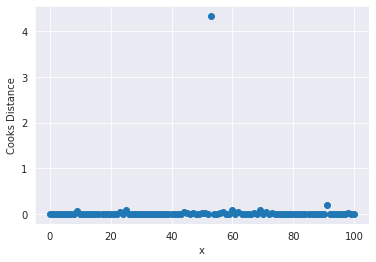

In [ ]:
plt.scatter(x=range(0,len(cooks[0])),y=cooks[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

One outlier can be seen clearly

tolerable cooks distance = 4/(n-p-1)

In [ ]:
tolerable_cooks_distance = 4/(len(cooks[0])-4-1)
tolerable_cooks_distance

0.041666666666666664

In [ ]:
high_cooks = cooks[0][cooks[0] > tolerable_cooks_distance]
high_cooks

array([0.05743172, 0.05179085, 0.08217991, 4.32498752, 0.04213894,
       0.08152872, 0.08041859, 0.0505275 , 0.19739834])

In [ ]:
pos = []
for i in high_cooks:
  pos.append(np.where(cooks[0]==i))

#finding index of the high_cooks values
pos

[(array([9]),),
 (array([23]),),
 (array([25]),),
 (array([53]),),
 (array([57]),),
 (array([60]),),
 (array([69]),),
 (array([71]),),
 (array([91]),)]

In [ ]:
pos = [pos[i][0][0] for i in range(len(pos))]

In [ ]:
pos

[9, 23, 25, 53, 57, 60, 69, 71, 91]

In [ ]:
train_X_new[train_X_new.index.isin([53,91])]

,SIXERS,COUNTRY_ENG,COUNTRY_IND,CAPTAINCY EXP_1
53,1,0,0,0
91,27,0,0,1


In [ ]:
train_X_new_cooks = train_X_new.drop([53,91], axis=0)
train_y_new_cooks = train_y_new.drop([53,91],axis=0)

In [ ]:
ipl_model5 = sm.OLS(train_y_new_cooks, train_X_new_cooks).fit()

In [ ]:
ipl_model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.707     
Dependent Variable:     SOLD PRICE       AIC:                         2815.9215 
Date:                   2022-02-22 16:15 BIC:                         2826.3020 
No. Observations:       99               Log-Likelihood:              -1404.0   
Df Model:               4                F-statistic:                 60.75     
Df Residuals:           95               Prob (F-statistic):          2.31e-25  
R-squared (uncentered): 0.719            Scale:                       1.2684e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
SIXERS             10007.3766   1786.8488 5.6006 0.0000   6460.0332   13554.7201
COUNTRY_ENG       950054.3668 362781.4026 2.6188 0.0103 229842.2234 1670266.5103
COUNTRY_IND       389184.8594  62016.7094 6.2755 0.0000 266066.1249  512303.5940
CAPTAINCY EXP_1   299724.3339  77122.1292 3.8864 0.0002 146617.5494  452831.1183
--------------------------------------------------------------------------------
Omnibus:                   1.635             Durbin-Watson:                2.203
Prob(Omnibus):             0.442             Jarque-Bera (JB):             1.201
Skew:                      0.258             Prob(JB):                     0.549
Kurtosis:                  3.159             Condition No.:                265  
================================================================================

"""

***Performance Metrics***

In [ ]:
pred_y = ipl_model5.predict(test_X[train_X_new_cooks.columns])

In [ ]:
np.sqrt(metrics.mean_squared_error(pred_y,test_y))

344119.90223311645

In [ ]:
np.round(metrics.r2_score(pred_y,test_y),4)

0.3408

***Transforming Response Variable***

In [ ]:
train_y_new_cooks = np.sqrt(train_y_new_cooks)

In [ ]:
ipl_model6 = sm.OLS(train_y_new_cooks, train_X_new_cooks).fit()

In [ ]:
ipl_model6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.737     
Dependent Variable:     SOLD PRICE       AIC:                         1455.0996 
Date:                   2022-02-22 16:15 BIC:                         1465.4800 
No. Observations:       99               Log-Likelihood:              -723.55   
Df Model:               4                F-statistic:                 70.39     
Df Residuals:           95               Prob (F-statistic):          1.42e-27  
R-squared (uncentered): 0.748            Scale:                       1.3602e+05
----------------------------------------------------------------------------------
                      Coef.     Std.Err.     t      P>|t|      [0.025      0.975] 
----------------------------------------------------------------------------------
SIXERS                 9.6919     1.8503   5.2379   0.0000      6.0185     13.3653
COUNTRY_ENG          580.6998   375.6725   1.5458   0.1255   -165.1044   1326.5039
COUNTRY_IND          491.0117    64.2204   7.6457   0.0000    363.5181    618.5053
CAPTAINCY EXP_1      373.5330    79.8626   4.6772   0.0000    214.9857    532.0802
--------------------------------------------------------------------------------
Omnibus:                    0.013             Durbin-Watson:               1.898
Prob(Omnibus):              0.994             Jarque-Bera (JB):            0.047
Skew:                       -0.016            Prob(JB):                    0.977
Kurtosis:                   2.899             Condition No.:               265  
================================================================================

"""

***Performance Metrics***

In [ ]:
pred_y = np.power(ipl_model6.predict(test_X[train_X_new_cooks.columns]),2)

In [ ]:
np.sqrt(metrics.mean_squared_error(pred_y,test_y))

556273.5268619834

In [ ]:
np.round(metrics.r2_score(pred_y,test_y),4)

0.4251

The presence of auto-correlation can be established using the Durbin-Watson test. As a thumb rule, a Durbin-Watson statistic close to 2 would imply the absence of autocorrelation. The model summary shows that the
Durbin−Watson statistics value is 1.9, which is less than 2; hence it can be concluded 
that the error terms are not auto-correlated. Note that auto-correlation is more
relevant in the case of time-series data.
 

Try removing country_eng column as its coeff is not significant by higher p-value

# Advanced ML

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = np.array([49,69,89,99,109])
y = np.array([124,95,71,45,18])

In [ ]:
X_mat = np.array([[1,1,1,1,1],[49,69,89,99,109]]).T
y_mat = y.T

In [ ]:
X_mat

array([[  1,  49],
       [  1,  69],
       [  1,  89],
       [  1,  99],
       [  1, 109]])

'A' matrix calculation

In [ ]:
A = np.dot(np.linalg.inv(np.dot(X_mat.T,X_mat)), np.dot(X_mat.T, y))

In [ ]:
w = A[1]
b = A[0]

In [ ]:
y_hat = b + np.dot(X,w)
y_hat

array([128.22413793,  94.32758621,  60.43103448,  43.48275862,
        26.53448276])

In [ ]:
sales_df = pd.read_csv('Advertising.csv')
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
Y = sales_df['Sales']

In [ ]:
Y = np.array((Y-Y.mean())/Y.std())
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(), axis=0)

In [ ]:
X

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


In [ ]:
import random

In [ ]:
def initialize(dim):
  #For reproducible results, the seet is set to 42.
  np.random.seed(seed=42)
  random.seed(42)
  #initialize the bias.
  b = random.random()
  #Initialize the weights
  w = np.random.rand(dim)
  return b,w

In [ ]:
b,w = initialize(3)

In [ ]:
print("Bias: ", b, "Weights: ", w)

Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]


In [ ]:
#INPUT
#b - bias
#w - weights
#X - the input matrix

def predict(b,w,X):
  return b + np.dot(X,w)

In [ ]:
Y_hat = predict(b,w,X)
Y_hat[:10]

array([ 3.23149557,  1.70784873,  2.82476076,  2.75309026,  0.92448558,
        3.17136498,  0.62234399, -0.34935444, -2.313095  , -0.76802983])

In [ ]:
import math

In [ ]:
def get_cost(Y,Y_hat):
  Y_resid = Y-Y_hat
  return np.sum(np.dot(Y_resid.T, Y_resid))/len(Y_resid)

In [ ]:
b,w = initialize(3)
Y_hat = predict(b,w,X)
get_cost(Y,Y_hat)

1.5303100198505888

In [ ]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
  #Gradient of bias
  db = (np.sum(y_hat - y) * 2) / len(y)
  #Gradient of weights
  dw = (np.dot((y_hat - y),x)*2)/len(y)
  #update bias
  b_1 = b_0 - learning_rate * db
  #upddate beta
  w_1 = w_0 - learning_rate * dw
  #return values
  return b_1, w_1

In [ ]:
b,w = initialize(3)
print('After initialization - Bias: ',b,'Weights: ',w)
Y_hat = predict(b,w,X)

b,w = update_beta(X, Y, Y_hat, b, w, 0.01)
print("After first update - Bias: ",b, "Weights: ",w)

After initialization - Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias:  0.6266382624887261 Weights:  [0.38079093 0.9376953  0.71484883]


In [ ]:
def run_gradient_descent(X, Y, alpha=0.01, num_iterations=100):
  #Initialize the bias and weights
  b,w = initialize(X.shape[1])

  # gd_terations_df keeps track of the cost every 10 iterations
  iter_num = 0
  gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])

  result_idx = 0

  for each_iter in range(num_iterations):
    Y_hat = predict(b,w,X)
    this_cost = get_cost(Y,Y_hat)

    prev_b = b
    prev_w = w

    b,w = update_beta(X, Y, Y_hat, prev_b, prev_w, alpha)

    #for every 10 iterations, store the cost i.e. MSE
    if(iter_num % 10==0):
      gd_iterations_df.loc[result_idx] = [iter_num, this_cost]

      result_idx += 1
    
    iter_num += 1

    print("Final estimate of b and w : ", b,w)

    return gd_iterations_df, b, w

In [ ]:
#learning parameter = 0.01
gd_iterations_df1, b, w = run_gradient_descent(X, Y, alpha=0.01, num_iterations=1000)

Final estimate of b and w :  0.6266382624887261 [0.38079093 0.9376953  0.71484883]


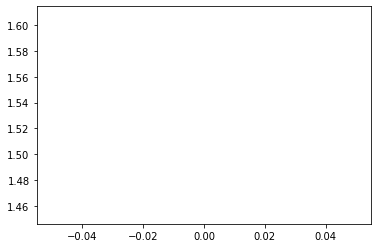

In [ ]:
import matplotlib.pyplot as plt
plt.plot(gd_iterations_df1['iteration'], gd_iterations_df1['cost'])

In [ ]:
gd_iterations_df1, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=10000)

Final estimate of b and w :  0.6381479448609679 [0.3751652  0.94941241 0.73027943]


Learning is faster for alpha value 0.01 compared to 0.001. For similar values, the learning could be slower whereas higher learning rate could lead to  skipping the minima of cost function. It is imperative to search for the optimal learibg parameter.

# Scikit-Learn Library for Machine Learning

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sales_df = pd.read_csv('Advertising.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sales_df[['TV', 'Radio', 'Newspaper']], sales_df['Sales'],train_size=0.7, random_state=42)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linreg.intercept_

2.7089490925159048

In [ ]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [ ]:
list(zip(X_train.columns, (linreg.coef_)))

[('TV', 0.044059280957465224),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.006882452222275487)]

Sales = 2.708 + 0.044TV + 0.199Radio + 0.006Newspaper

In [ ]:
y_pred = linreg.predict(X_test)
resid = (y_test - y_pred)

In [ ]:
test_pred_df = pd.DataFrame({'Actual':y_test, 'Predicted':np.round(y_pred,2)})

In [ ]:
test_pred_df[:10]

,Actual,Predicted
95,16.9,16.57
15,22.4,21.19
30,21.4,21.55
158,7.3,10.89
128,24.7,22.20
115,12.6,13.36
69,22.3,21.20
170,8.4,7.35
174,11.5,13.28
45,14.9,15.12


In [ ]:
from sklearn import metrics

In [ ]:
r2 =  metrics.r2_score(y_train, linreg.predict(X_train))
r2

0.9055159502227753

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

3.796797236715219

In [ ]:
rmse = round(np.sqrt(mse),2)
rmse

1.95

***Validation dataset***

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sales_df = pd.read_csv("Advertising.csv")
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = sales_df.drop('Sales', axis=1)
Y = sales_df['Sales']

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(X,Y,train_size=0.7, random_state=42)

In [ ]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other,y_other,train_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

For one standard deviation change in the X value, the Y standard deviation changes by Beta times.

Standardized beta = unstandardized Beta X (stdev X/stdev Y)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_eval = scaler.transform(X_eval)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lm.predict(X_eval)

In [ ]:
metrics.mean_squared_error(y_eval, pred)

2.5490385687174184

**K-fold validation**

In [ ]:
sales_df = pd.read_csv('Advertising.csv')

In [ ]:
X = sales_df.drop('Sales',axis=1)
y = sales_df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [ ]:
lm = LinearRegression()

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)

In [ ]:
abs(scores.mean())

0.8627872839147471

In [ ]:
scores

array([0.89667066, 0.92803914, 0.80641155, 0.91762366, 0.7651914 ])

The choice of k is usually between 5-10

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = lm.predict(X_test)

In [ ]:
lm.coef_

array([ 3.76599021,  2.76548662, -0.00690986])

In [ ]:
metrics.mean_squared_error(pred, y_test)

2.2987166978863787

***Lasso Regression (L1 Norm)***

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=0.01, max_iter=5000, random_state=101)

if alpha=0, then it is a OLS/Linear Regression model

In [ ]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=5000, random_state=101)

In [ ]:
lasso_model.coef_

array([ 3.75598404,  2.7540475 , -0.        ])

In [ ]:
predict = lasso_model.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test,predict)

2.306637069323966

***Lasso with CV***

lasso with cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lassoCV_model = LassoCV(eps=0.001, alphas=[.1,1,10], cv=5, max_iter=10000)

In [ ]:
lassoCV_model.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1, 10], cv=5, max_iter=10000)

In [ ]:
lassoCV_model.alpha_

0.1

In [ ]:
predict = lassoCV_model.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test,predict)

2.387342642087474

In [ ]:
metrics.r2_score(y_test,predict)

0.9154389067914471

In [ ]:
lassoCV_model.mse_path_

array([[31.13030692, 22.5494332 , 31.15520408, 27.96344707, 21.69819196],
       [ 6.46880733,  2.39148256,  8.410171  ,  3.8935656 ,  5.10592176],
       [ 3.206943  ,  1.48006525,  5.37625628,  2.18207606,  4.21841314]])

---

***Ridge Regression (L2 Norm)***

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1, max_iter=1000)

In [ ]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1, max_iter=1000)

In [ ]:
predict = ridge_model.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, predict)

2.319021579428752

In [ ]:
metrics.r2_score(y_test, predict)

0.9178588793775941

In [ ]:
ridge_model.coef_

array([3.73961770e+00, 2.74477719e+00, 2.68837098e-03])

Ridge model doesn't make any coeff 0 but it starts nearing to zero whereas in Lasso, it makes the coeff 0

---

***Ridge with CV***

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_modelCV = RidgeCV(alphas=(0.1,1,10), scoring='neg_mean_squared_error', cv=5)

In [ ]:
ridge_modelCV.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5,
        scoring='neg_mean_squared_error')

In [ ]:
ridge_modelCV.alpha_

0.1

In [ ]:
predict = ridge_modelCV.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, predict)

2.300652700356323

In [ ]:
metrics.r2_score(y_test,predict)

0.9185095159757919

***Elastic Net***

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
enet = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000)

In [ ]:
enet.fit(X_train, y_train)

ElasticNet(alpha=0.001, max_iter=10000)

In [ ]:
predict = enet.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test,predict)

2.300511846625849

***Elastic net With CV***

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
enetCV = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.99, 1], eps=0.001, n_alphas=100, max_iter=100000, cv=5)

In [ ]:
enetCV.fit(X_train,y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.99, 1], max_iter=100000)

In [ ]:
enetCV.l1_ratio_

1.0

In [ ]:
enetCV.alpha_

0.0915650077992293

In [ ]:
predict = enetCV.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, predict)

2.378465739597505

***Grid Search CV***

In [ ]:
sales_df = pd.read_csv("Advertising.csv")
X = sales_df.drop('Sales', axis=1)
y = sales_df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=101)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
base_model = ElasticNet()

In [ ]:
param = {'alpha':[0.001, 0.01, 1, 5, 10, 50], 'l1_ratio':[.1, .5, .7, .95, .99, 1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(estimator = base_model, param_grid = param, scoring='neg_mean_squared_error', cv=5, verbose=1)

In [ ]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 50],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
pred = grid_model.predict(X_test)

In [ ]:
metrics.mean_squared_error(y_test, pred)

2.306637069323966

In [ ]:
metrics.r2_score(y_test, pred)

0.9182975460753906

In [ ]:
grid_model.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=1)

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001631,0.000296,0.000660,0.000040,0.001,0.1,"{'alpha': 0.001, 'l1_ratio': 0.1}",-3.140774,-1.617818,-5.376771,-2.239327,-4.344027,-3.343743,1.369198,11
1,0.001203,0.000051,0.000665,0.000046,0.001,0.5,"{'alpha': 0.001, 'l1_ratio': 0.5}",-3.140248,-1.618874,-5.375274,-2.240185,-4.342353,-3.343387,1.368120,10
2,0.001301,0.000031,0.000691,0.000034,0.001,0.7,"{'alpha': 0.001, 'l1_ratio': 0.7}",-3.139987,-1.619404,-5.374526,-2.240616,-4.341578,-3.343222,1.367589,9
3,0.001290,0.000057,0.000675,0.000031,0.001,0.95,"{'alpha': 0.001, 'l1_ratio': 0.95}",-3.139662,-1.620067,-5.373582,-2.241156,-4.340533,-3.343000,1.366912,8
4,0.001244,0.000046,0.000648,0.000024,0.001,0.99,"{'alpha': 0.001, 'l1_ratio': 0.99}",-3.139610,-1.620174,-5.373433,-2.241243,-4.340366,-3.342965,1.366804,7
5,0.001340,0.000120,0.000665,0.000083,0.001,1,"{'alpha': 0.001, 'l1_ratio': 1}",-3.139597,-1.620200,-5.373395,-2.241265,-4.340324,-3.342956,1.366777,6
6,0.001336,0.000075,0.000676,0.000021,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-3.155670,-1.578515,-5.404503,-2.215563,-4.366017,-3.344054,1.393985,12
7,0.001306,0.000088,0.000650,0.000023,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-3.149523,-1.587881,-5.388993,-2.222885,-4.348948,-3.339646,1.383510,5
8,0.001304,0.000034,0.000665,0.000033,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-3.146593,-1.592728,-5.381305,-2.226729,-4.340462,-3.337563,1.378228,4
9,0.001303,0.000048,0.000643,0.000033,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-3.143068,-1.598943,-5.371757,-2.231708,-4.329901,-3.335076,1.371583,3


# Temperature Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
df = pd.read_excel('Temperature.xlsx')

In [ ]:
df.head()

,Flight Number,Launch Temperature,Damage to O-ring
0,STS 1,66,0
1,STS 2,70,1
2,STS 3,69,0
3,STS 4,80,0
4,STS 5,68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Flight Number       24 non-null     object
 1   Launch Temperature  24 non-null     int64 
 2   Damage to O-ring    24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


In [ ]:
df['Damage to O-ring'].value_counts()

0    17
1     7
Name: Damage to O-ring, dtype: int64

In [ ]:
X = df['Launch Temperature']
y = df['Damage to O-ring']
X = np.array(X).reshape(-1,1)

In [ ]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [ ]:
pred_y = model.predict(X)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [ ]:
model.predict_proba(X)

array([[0.57102623, 0.42897377],
       [0.77197036, 0.22802964],
       [0.72831943, 0.27168057],
       [0.97216005, 0.02783995],
       [0.67977869, 0.32022131],
       [0.62700679, 0.37299321],
       [0.84372193, 0.15627807],
       [0.87208756, 0.12791244],
       [0.77197036, 0.22802964],
       [0.14013361, 0.85986639],
       [0.39794525, 0.60205475],
       [0.77197036, 0.22802964],
       [0.95632545, 0.04367455],
       [0.62700679, 0.37299321],
       [0.06022167, 0.93977833],
       [0.62700679, 0.37299321],
       [0.9157735 , 0.0842265 ],
       [0.77197036, 0.22802964],
       [0.97782589, 0.02217411],
       [0.93211349, 0.06788651],
       [0.96509817, 0.03490183],
       [0.9157735 , 0.0842265 ],
       [0.93211349, 0.06788651],
       [0.17067898, 0.82932102]])

This gives values for the class 0 and class 1 respectively.

***Performance Metrics***

In [ ]:
print(confusion_matrix(y, pred_y))

[[17  0]
 [ 3  4]]


In [ ]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.57      0.73         7

    accuracy                           0.88        24
   macro avg       0.93      0.79      0.82        24
weighted avg       0.89      0.88      0.86        24



In [ ]:
metrics.accuracy_score(y, pred_y)

0.875

In [ ]:
#Area under the curve
auc = metrics.roc_auc_score(y, model.predict_proba(X)[:, 1])
auc

0.7941176470588235

***Drawing the ROC curve***

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y, model.decision_function(X))

In [ ]:
roc_auc = metrics.auc(fpr,tpr)

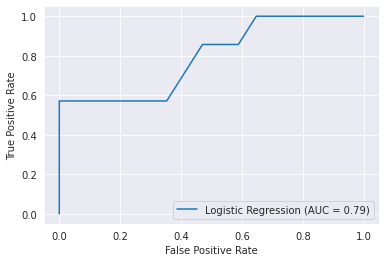

In [ ]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

---

# Bank Model

In [ ]:
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [ ]:
bank_df['subscribed'].value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [ ]:
from sklearn.utils import resample

In [ ]:
bank_subsribed_no = bank_df[bank_df['subscribed']=='no']
bank_subsribed_yes = bank_df[bank_df['subscribed']=='yes']

In [ ]:
df_minority_upsampled = resample(bank_subsribed_yes, replace=True, n_samples=2000, random_state=42)

In [ ]:
new_bank_df = pd.concat([bank_subsribed_no, df_minority_upsampled])

In [ ]:
new_bank_df['subscribed'].value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

In [ ]:
new_bank_df.tail()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
619,35,technician,married,tertiary,no,7050,no,no,3,4,yes
1177,28,self-employed,single,tertiary,no,4579,no,no,2,0,yes
3498,58,services,divorced,secondary,no,462,no,no,1,1,yes
4366,59,retired,married,secondary,no,0,no,no,1,0,yes
4328,49,admin.,married,secondary,no,3608,yes,no,1,0,yes


In [ ]:
# from sklearn.utils import shuffle
# new_bank_df = shuffle(new_bank_df)

In [ ]:
new_bank_df.tail()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
619,35,technician,married,tertiary,no,7050,no,no,3,4,yes
1177,28,self-employed,single,tertiary,no,4579,no,no,2,0,yes
3498,58,services,divorced,secondary,no,462,no,no,1,1,yes
4366,59,retired,married,secondary,no,0,no,no,1,0,yes
4328,49,admin.,married,secondary,no,3608,yes,no,1,0,yes


In [ ]:
X_features = list(new_bank_df.columns)
X_features.remove('subscribed')

In [ ]:
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [ ]:
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first=True)

In [ ]:
X=encoded_bank_df
X

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,35,7050,3,4,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1177,28,4579,2,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3498,58,462,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4366,59,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
Y = new_bank_df['subscribed'].map(lambda x: int(x=='yes'))
Y

0       0
1       0
2       0
3       0
4       0
       ..
619     1
1177    1
3498    1
4366    1
4328    1
Name: subscribed, Length: 6000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(penalty='l1', C=10 ,max_iter=100000, solver='liblinear')

In [ ]:
model.fit(train_X, train_y)

LogisticRegression(C=10, max_iter=100000, penalty='l1', solver='liblinear')

In [ ]:
pred_y = model.predict(test_X)
pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(test_X)

array([[0.52723792, 0.47276208],
       [0.8020598 , 0.1979402 ],
       [0.66935468, 0.33064532],
       ...,
       [0.70427688, 0.29572312],
       [0.68620085, 0.31379915],
       [0.59829056, 0.40170944]])

**Performance metrics**

In [ ]:
print(confusion_matrix(test_y, pred_y))

[[1141   84]
 [ 432  143]]


In [ ]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1225
           1       0.63      0.25      0.36       575

    accuracy                           0.71      1800
   macro avg       0.68      0.59      0.59      1800
weighted avg       0.69      0.71      0.67      1800



In [ ]:
metrics.accuracy_score(test_y,pred_y)

0.7133333333333334

In [ ]:
metrics.roc_auc_score(test_y, model.predict_proba(test_X)[:,1])

0.6785448092280391

**Drawing ROC Curve**

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(test_y, model.decision_function(test_X))

In [ ]:
roc_auc = metrics.auc(fpr, tpr)

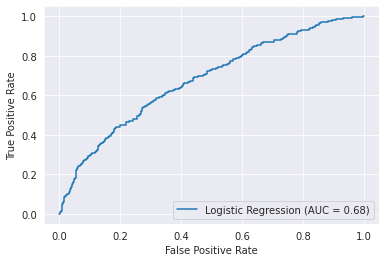

In [ ]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name="Logistic Regression")
display.plot()
plt.show()

# Iris Model

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
X_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
X = iris.drop('species', axis=1)

In [ ]:
y = iris['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
#Create one-vs-rest Logistic Regression
logistic_regression = LogisticRegression(random_state=42, multi_class='ovr')

Logistic regression is built for binary class classification, but here we have multiclass classification, so we use ovr where iris-setosa will be considered as one class and rest two will be treated as one another class and similarly will be going on for each and every class

In [ ]:
model1 = logistic_regression.fit(train_X, train_y)

In [ ]:
pred_y = model1.predict(test_X)

In [ ]:
pred_y

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa'], dtype=object)

**Performance Metrics**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(test_y, pred_y))

[[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]


In [ ]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.69      0.82        13
   virginica       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(test_y, pred_y)

0.9111111111111111

In [ ]:
# auc = metrics.roc_auc_score(test_y, model1.predict_proba((test_X), multi_class='ovr', average='weighted'))
# auc